In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics as m
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold
import pandas as pd

# Adults income dataset

In [216]:
adults_raw = pd.read_csv("./Adult/adult.data", header=None)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(adults_raw)
adults=enc.transform(adults_raw)
adults_input = adults[:,0:14]
adults_input
adults_target = adults[:,14]
adults_target

array([0, 0, 0, ..., 0, 0, 1])

### Decision Tree

In [217]:
tclf = tree.DecisionTreeClassifier()
tclf.fit(adults_input,adults_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [218]:
adults_raw_test = pd.read_csv("./Adult/adult.test", header=None)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(adults_raw_test)
adults_test=enc.transform(adults_raw_test)
adults_input_test = adults_test[:,0:14]
adults_input_test
adults_target_test = adults_test[:,14]
adults_target_test

array([0, 0, 1, ..., 0, 0, 1])

In [219]:
tclf.score(adults_input_test,adults_target_test)
adults_test_predicted = tclf.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, adults_test_predicted))
print(m.precision_score(adults_target_test, adults_test_predicted))
print(m.recall_score(adults_target_test, adults_test_predicted))
print(m.f1_score(adults_target_test, adults_test_predicted))

[[10812  1585]
 [ 1623  2261]]
0.8029605061114182
0.5821318228630278
0.5878835153406137
0.584993531694696


### Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(adults_input,adults_target)
gnb.score(adults_input_test,adults_target_test)
gnb_adults_test_predicted = gnb.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(gnb_adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, gnb_adults_test_predicted))
print(m.precision_score(adults_target_test, gnb_adults_test_predicted))
print(m.recall_score(adults_target_test, gnb_adults_test_predicted))
print(m.f1_score(adults_target_test, gnb_adults_test_predicted))

[[11627  2106]
 [  808  1740]]
0.821018364965297
0.6828885400313972
0.45241809672386896
0.5442602439787301


### Support vector machine

In [221]:
from sklearn.svm import SVC
svcl = SVC(gamma='scale')
svcl.fit(adults_input,adults_target)
svcl.score(adults_input_test,adults_target_test)
svcl_adults_test_predicted = svcl.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(svcl_adults_test_predicted, adults_target_test)
print(cnf_matrix)
print(m.accuracy_score(adults_target_test, svcl_adults_test_predicted))
print(m.precision_score(adults_target_test, svcl_adults_test_predicted))
print(m.recall_score(adults_target_test, svcl_adults_test_predicted))
print(m.f1_score(adults_target_test, svcl_adults_test_predicted))

[[12205  3044]
 [  230   802]]
0.7989067010625883
0.7771317829457365
0.20852834113364535
0.3288232882328823


-----------

## Dishonest Internet users Dataset Data Set

### The dataset was used to test an architecture based on a trust model capable to cope with the evaluation of the trustworthiness of users interacting in pervasive environments.

Dataset Characeteristics: Multivariate <br>
Attribute Characteristics: Integer, Real <br>
Number of Instances: 322 <br>
Number of Attributes: 5 <br>
Missing Values: No 
	

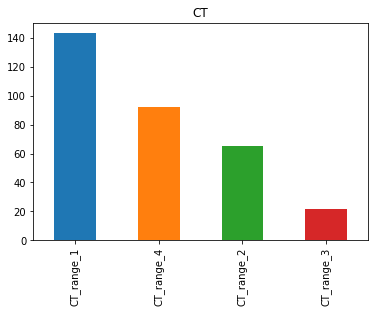

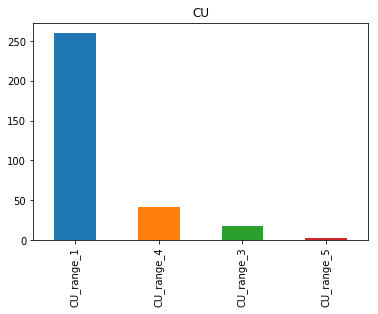

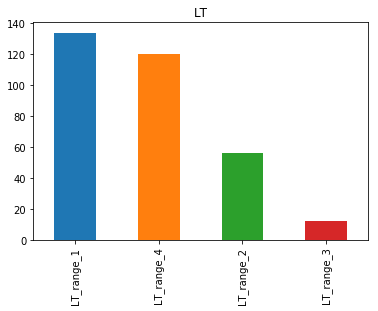

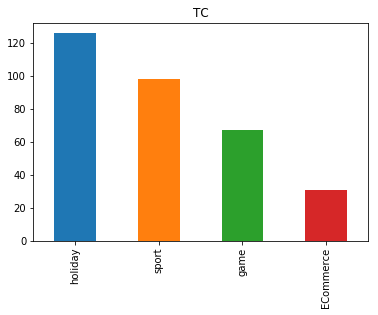

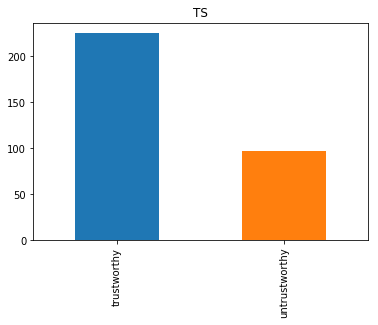

In [13]:
from sklearn.model_selection import GridSearchCV

header = ['CT','CU', 'LT', 'TC', 'TS']
internet_raw = pd.read_csv('./internet/internet.txt', sep=' ',names=header)
enc = OrdinalEncoder(categories='auto', dtype=int)
enc.fit(internet_raw)
internet=enc.transform(internet_raw)
internet_input = internet[:,0:4]
internet_target = internet[:,4]

for item in header:
    internet_raw[item].value_counts().plot(title = item, kind='bar')
    plt.show()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(clf,x,y, k):

    cvs=cross_val_score(clf,x, y, scoring='accuracy', cv=k)
    score=sum(cvs)/len(cvs)
    print('Avg. 5 fold cross validation accuracy: '+str(score))

    y_pred = cross_val_predict(clf, x, y, cv=5)
    cnf = confusion_matrix(y, y_pred)
    classes = ["Trustworthy","Untrustworthy"]
    plot_confusion_matrix(cnf,classes)

In [10]:
import itertools
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
def get_pd_overview(cv_results):
    pd_results = pd.DataFrame(grid_search.cv_results_)
    params = pd_results.loc[:,"params"]
    mean_test_scores = pd_results.loc[:,"mean_test_score"]
    frames = [mean_test_scores, params]
    overview = pd.concat(frames,  axis=1)
    return overview

### Decision Tree

In [15]:
## DECISION TREE
param_grid = [
  {'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

tclf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(tclf, param_grid, cv = 5, iid=False, return_train_score=True)
grid_search.fit(internet_input, internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [17]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

   mean_test_score                                     params
0         0.609567      {'criterion': 'gini', 'max_depth': 1}
1         1.000000      {'criterion': 'gini', 'max_depth': 5}
2         1.000000     {'criterion': 'gini', 'max_depth': 10}
3         1.000000     {'criterion': 'gini', 'max_depth': 50}
4         0.609567   {'criterion': 'entropy', 'max_depth': 1}
5         0.993846   {'criterion': 'entropy', 'max_depth': 5}
6         0.993846  {'criterion': 'entropy', 'max_depth': 10}
7         1.000000  {'criterion': 'entropy', 'max_depth': 50}

Best parameters:  {'criterion': 'gini', 'max_depth': 5}


Avg. 5 fold cross validation accuracy: 0.9938461538461538


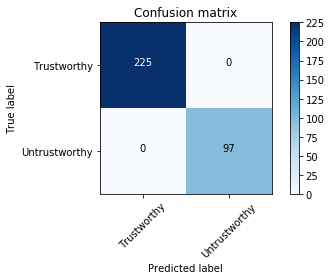

In [16]:
tclf = grid_search.best_estimator_
evaluate(tclf,internet_input, internet_target, 5)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

## RANDOM FOREST
param_grid = [
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

rfclf = RandomForestClassifier()
grid_search = GridSearchCV(rfclf, param_grid, cv = 5, iid=False, return_train_score=True)
grid_search.fit(internet_input, internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [19]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)


    mean_test_score                                             params
0          0.699231  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
1          0.760769  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
2          0.760769  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
3          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
4          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
5          1.000000  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
6          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
7          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
8          1.000000  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
9          1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
10         1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
11         1.000000  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
12         0.760769  {'criterion': 'entropy', 'max_depth': 1, 'n_es...
13    

Avg. 5 fold cross validation accuracy: 1.0


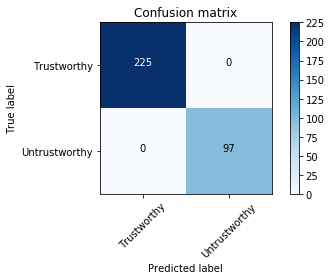

In [20]:
rfclf = grid_search.best_estimator_
evaluate(rfclf,internet_input, internet_target, 5)

### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

## GAUSSIAN NAIVE BAYES

gnb = GaussianNB()
gnb.fit(internet_input,internet_target)

GaussianNB(priors=None, var_smoothing=1e-09)

Avg. 5 fold cross validation accuracy: 0.5588461538461539


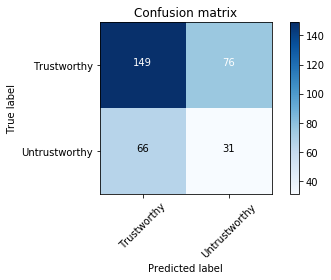

In [29]:
evaluate(gnb,internet_input, internet_target,5)

### Support vector machine

In [23]:
from sklearn.svm import SVC

## SUPPORT VECTOR MACHINE

svcl = SVC()
param_grid = [
  {'gamma': [0.001, 0.01, 0.1, 1.0, "scale"],'C': [0.1, 1, 10, 100, 1000], 'kernel': ["rbf"]}
 ]

grid_search = GridSearchCV(svcl, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(internet_input, internet_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [24]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                                          params
0          0.698798     {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
1          0.698798      {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
2          0.754615       {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
3          0.932308       {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
4          0.792019   {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
5          0.698798       {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
6          0.776394        {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
7          0.932212         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
8          1.000000         {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
9          0.938462     {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
10         0.742548      {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
11         0.754856       {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
12         0.993750        {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
13         1.000000        {'C': 10, 'gamma': 1.

Avg. 5 fold cross validation accuracy: 1.0


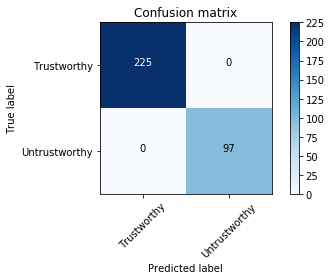

In [27]:
svcl = grid_search.best_estimator_
evaluate(svcl,internet_input, internet_target,5)